In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression,Ridge, Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [2]:
housing = fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [3]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [4]:
data = housing.data[:,0:2]
target = housing.target
data

array([[ 8.3252, 41.    ],
       [ 8.3014, 21.    ],
       [ 7.2574, 52.    ],
       ...,
       [ 1.7   , 17.    ],
       [ 1.8672, 18.    ],
       [ 2.3886, 16.    ]])

In [5]:
df = pd.DataFrame(data, columns=["Feature0","Feature1"])
df["target"] = target
df.shape

(20640, 3)

In [6]:
df.head()

,Feature0,Feature1,target
0,8.3252,41.0,4.526
1,8.3014,21.0,3.585
2,7.2574,52.0,3.521
3,5.6431,52.0,3.413
4,3.8462,52.0,3.422


<Axes: >

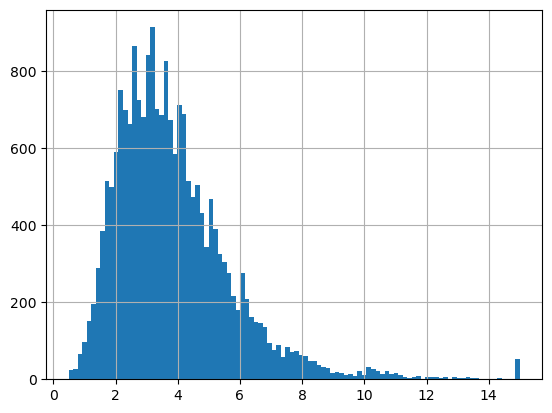

In [7]:
df.Feature0.hist(bins=100)

<Axes: >

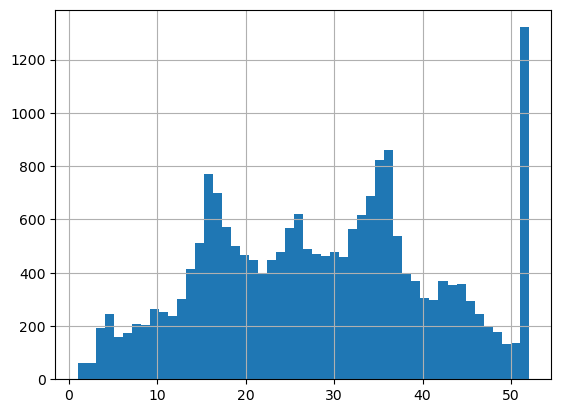

In [8]:
df.Feature1.hist(bins=50)

<Axes: >

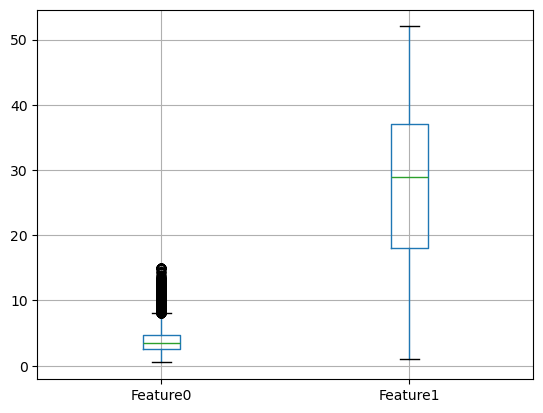

In [9]:
df.boxplot(column = ["Feature0","Feature1"])

In [10]:
x= df[["Feature0","Feature1"]]
y= df["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (14448, 2)
x_test shape:  (6192, 2)
y_train shape:  (14448,)
y_test shape:  (6192,)


In [13]:
reg = LinearRegression ()
model = reg.fit(x_train,y_train)
y_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [15]:
r2_train = r2_score(y_pred_test,y_test)
print("r2_train : ",r2_train.round(4))

r2_train :  0.0353


In [16]:
model.intercept_

-0.10299578449607072

In [17]:
model.coef_

array([0.43176259, 0.01743944])

Text(0, 0.5, 'target')

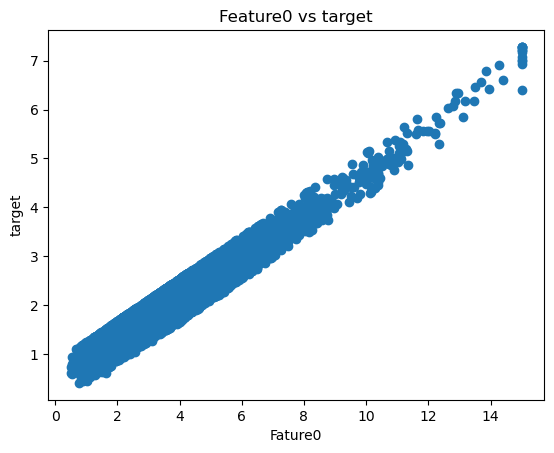

In [18]:
plt.scatter(x_test["Feature0"],y_pred_test)
plt.title("Feature0 vs target")
plt.xlabel("Fature0")
plt.ylabel("target")

Text(0, 0.5, 'target')

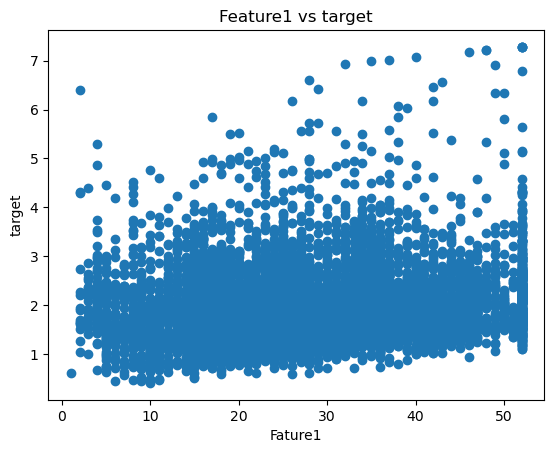

In [19]:
plt.scatter(x_test["Feature1"],y_pred_test)
plt.title("Feature1 vs target")
plt.xlabel("Fature1")
plt.ylabel("target")

### &#10148; improve performance
- hyperparameter tuning
- use more complex and effective models
- interaction Features (interaction should always be applied on train and test separately)


In [21]:
interaction = PolynomialFeatures(degree=3,include_bias=False, interaction_only=True)

In [22]:
feature_interaction =interaction.fit_transform(df[["Feature1","Feature0"]])
feature_interaction

array([[ 41.    ,   8.3252, 341.3332],
       [ 21.    ,   8.3014, 174.3294],
       [ 52.    ,   7.2574, 377.3848],
       ...,
       [ 17.    ,   1.7   ,  28.9   ],
       [ 18.    ,   1.8672,  33.6096],
       [ 16.    ,   2.3886,  38.2176]])

In [23]:
x_tarin,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (14448, 2)
x_test shape:  (6192, 2)
y_train shape:  (14448,)
y_test shape:  (6192,)


In [24]:
reg = LinearRegression ()
model = reg.fit(x_train,y_train)
y_train = model.predict(x_train)
y_pred_test = model.predict(x_test) 
r2_train = r2_score(y_pred_test,y_test)
print("r2_train : ",r2_train.round(4))

r2_train :  0.0353


In [25]:
ploy = PolynomialFeatures(degree=3,include_bias =False,interaction_only=True).fit_transform(x)

In [26]:
ploy[0]

array([  8.3252,  41.    , 341.3332])

In [40]:
x_tarin,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (14448, 2)
x_test shape:  (6192, 2)
y_train shape:  (14448,)
y_test shape:  (6192,)


In [42]:
reg = LinearRegression ()
model = reg.fit(x_train,y_train)
y_train = model.predict(x_train)
y_pred_test = model.predict(x_test) 
r2_train = r2_score(y_pred_test,y_test)
print("r2_train : ",r2_train.round(4))

r2_train :  0.0353


### &#10148; Regularization : to control overfitting

In [81]:
feature = housing.data[:,:]
target = housing.target
df = pd.DataFrame(feature,target, columns= ["Feature0","Feature1","Feature2","Feature3","Feature4","Feature5","Feature6","Feature7"])

In [83]:
df ["target"] = target

In [85]:
x = df.loc[:,df.columns!="target"]
y=df["target"]

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [89]:
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (14448, 8)
x_test shape:  (6192, 8)
y_train shape:  (14448,)
y_test shape:  (6192,)


In [90]:
reg = LinearRegression ()
model = reg.fit(x_train,y_train)
y_train = model.predict(x_train)
y_pred_test = model.predict(x_test) 
r2_train = r2_score(y_pred_test,y_test)
print("r2_train : ",r2_train.round(4))

r2_train :  0.3451


In [91]:
reg = Lasso (alpha=0.5)
model = reg.fit(x_train,y_train)
y_train = model.predict(x_train)
y_pred_test = model.predict(x_test) 
r2_train = r2_score(y_pred_test,y_test)
print("r2_train : ",r2_train.round(4))

r2_train :  -1.3798


In [96]:
reg = Lasso (alpha=0.5)
model = reg.fit(x_train,y_train)
y_train = model.predict(x_train)
y_pred_test = model.predict(x_test) 
r2_train = r2_score(y_pred_test,y_test)
print("r2_train : ",r2_train.round(4))

r2_train :  -10.9738


In [104]:
reg = ElasticNet (alpha=0.4)
model = reg.fit(x_train,y_train)
y_train = model.predict(x_train)
y_pred_test = model.predict(x_test) 
r2_train = r2_score(y_pred_test,y_test)
print("r2_train : ",r2_train.round(4))

r2_train :  -39.177
